# **LOGISTIC REGRESSION**



1. Data Exploration:

a. Load the dataset and perform exploratory data analysis (EDA).

b. Examine the features, their types, and summary statistics.

c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.

2. Data Preprocessing:

a. Handle missing values (e.g., imputation).

b. Encode categorical variables.

3. Model Building:

a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

b. Train the model using the training data.

4. Model Evaluation:

a. Evaluate the performance of the model on the testing data
using accuracy, precision, recall, F1-score, and ROC-AUC score.
Visualize the ROC curve.

5. Interpretation:

a. Interpret the coefficients of the logistic regression model.

b. Discuss the significance of features in predicting the target variable (survival probability in this case).

6. Deployment with Streamlit:

In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions.

(optional)For online deployment, use Streamlit Community Cloud, which supports deployment from GitHub repositories.
Detailed deployment instructions are available in the Streamlit Documentation.

https://docs.streamlit.io/streamlit-community-cloud/deploy-your-app

Interview Questions:

1. What is the difference between precision and recall?

2. What is cross-validation, and why is it important in binary classification?



VARIABLE DESCRIPTIONS:

Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

survival - Survival (0 = No; 1 = Yes) (Target Variable)

name - Name

sex - Sex

age - Age

sibsp - Number of Siblings/Spouses Aboard

parch - Number of Parents/Children Aboard

ticket - Ticket Number

fare - Passenger Fare (British pound)

cabin - Cabin

embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### **1. Data Exploration:**
a.Load the dataset and perform exploratory data analysis (EDA).

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
train_df = pd.read_csv('/content/Titanic_train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [180]:
test_df = pd.read_csv('/content/Titanic_test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [181]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [182]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [183]:
print("Summary Statistics for Training Dataset:")
train_df.describe().T

Summary Statistics for Training Dataset:


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [184]:
print("Summary Statistics for Testing Dataset:")
test_df.describe().T

Summary Statistics for Testing Dataset:


,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [185]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


we can find null values in 'Age','Cabin','Embarked'

In [186]:
test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


we can find null values in 'Age','Cabin','Embarked'

In [187]:
# Age Distribution
import plotly.express as px
fig = px.histogram(train_df, x='Age', nbins=20,title='Age Distribution in Training Dataset')
fig.update_layout(xaxis_title='Age', yaxis_title='Frequency')
fig.show()

# Fare Distribution
fig = px.histogram(train_df, x='Fare', nbins=20, title='Fare Distribution in Training Dataset')
fig.update_layout(xaxis_title='Fare', yaxis_title='Frequency')
fig.show()

Most of the members falls under age of 17.5 - 27.5

Fare of 0-25 has high no of members with 557 count

In [188]:
# Age Distribution
import plotly.express as px
fig = px.histogram(test_df, x='Age', nbins=20,title='Age Distribution in Testing Dataset')
fig.update_layout(xaxis_title='Age', yaxis_title='Frequency')
fig.show()

# Fare Distribution
fig = px.histogram(test_df, x='Fare', nbins=20, title='Fare Distribution in Testing Dataset')
fig.update_layout(xaxis_title='Fare', yaxis_title='Frequency')
fig.show()

In testing data -
age between 17.5 to 32.5 are more in number

Fare between 0-25 are having more members

In [189]:
# Count of Passengers by Sex
fig = px.bar(train_df['Sex'].value_counts(),
             x=train_df['Sex'].value_counts().index,
             y=train_df['Sex'].value_counts().values,
             labels={'x':'Sex', 'y':'Count'},
             title='Count of Passengers by Sex in Training Dataset')
fig.show()

# Count of Passengers by Embarked Port
fig = px.bar(train_df['Embarked'].value_counts(),
             x=train_df['Embarked'].value_counts().index,
             y=train_df['Embarked'].value_counts().values,
             labels={'x':'Embarked Port', 'y':'Count'},
             title='Count of Passengers by Embarked Port in Training Dataset')
fig.show()

Embarked - Port of Embarkation S - Southampton has more passengers

Male are more in members in boat

In [190]:
# Count of Passengers by Sex
fig = px.bar(test_df['Sex'].value_counts(),
             x=test_df['Sex'].value_counts().index,
             y=test_df['Sex'].value_counts().values,
             labels={'x':'Sex', 'y':'Count'},
             title='Count of Passengers by Sex in Testing Dataset')
fig.show()

# Count of Passengers by Embarked Port
fig = px.bar(test_df['Embarked'].value_counts(),
             x=test_df['Embarked'].value_counts().index,
             y=test_df['Embarked'].value_counts().values,
             labels={'x':'Embarked Port', 'y':'Count'},
             title='Count of Passengers by Embarked Port in Testing Dataset')
fig.show()

Embarked - Port of Embarkation S - Southampton has more passengers

Male are more in members in boat

<ipython-input-191-c5a5a0d48c67>:1: FutureWarning:

The provided callable <function sum at 0x7ff461123250> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



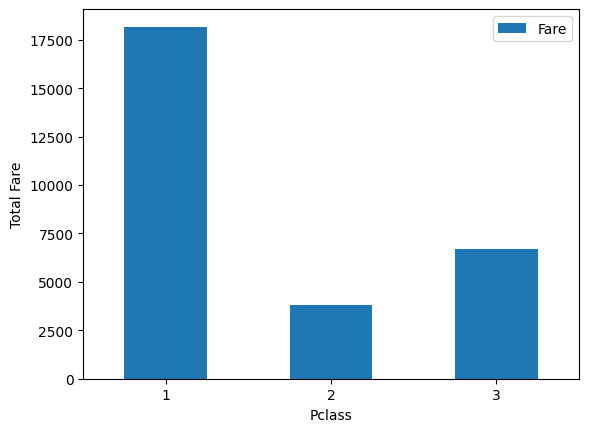

In [191]:
class_fare = train_df.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

Class 1 has higher fare

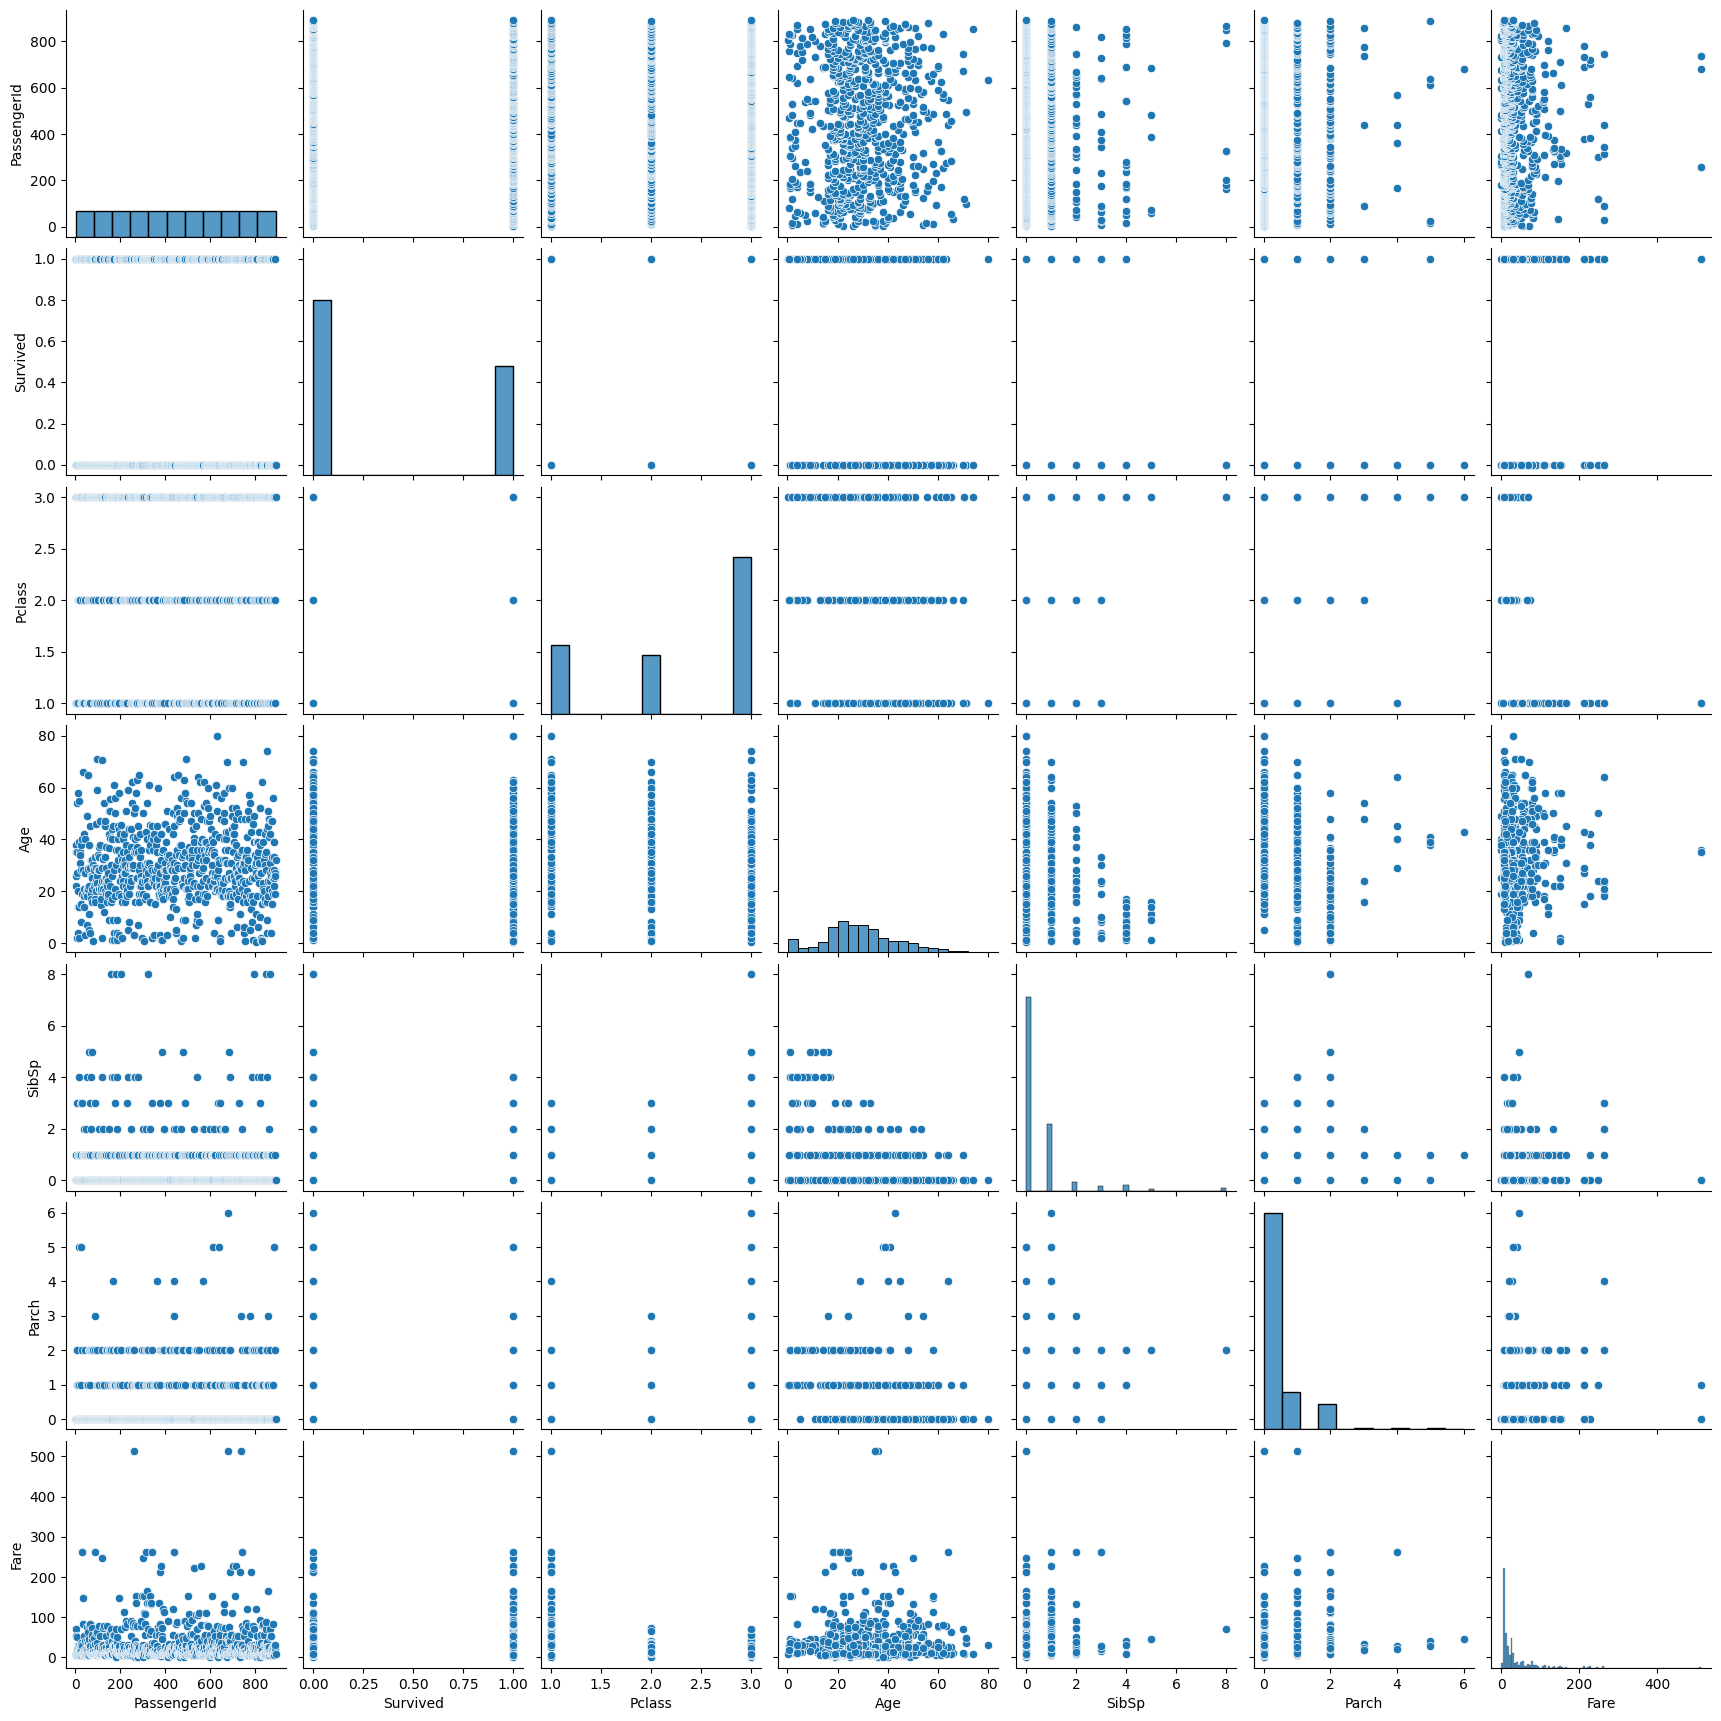

In [192]:
#pairplot for train_df
sns.pairplot(train_df)
plt.show()


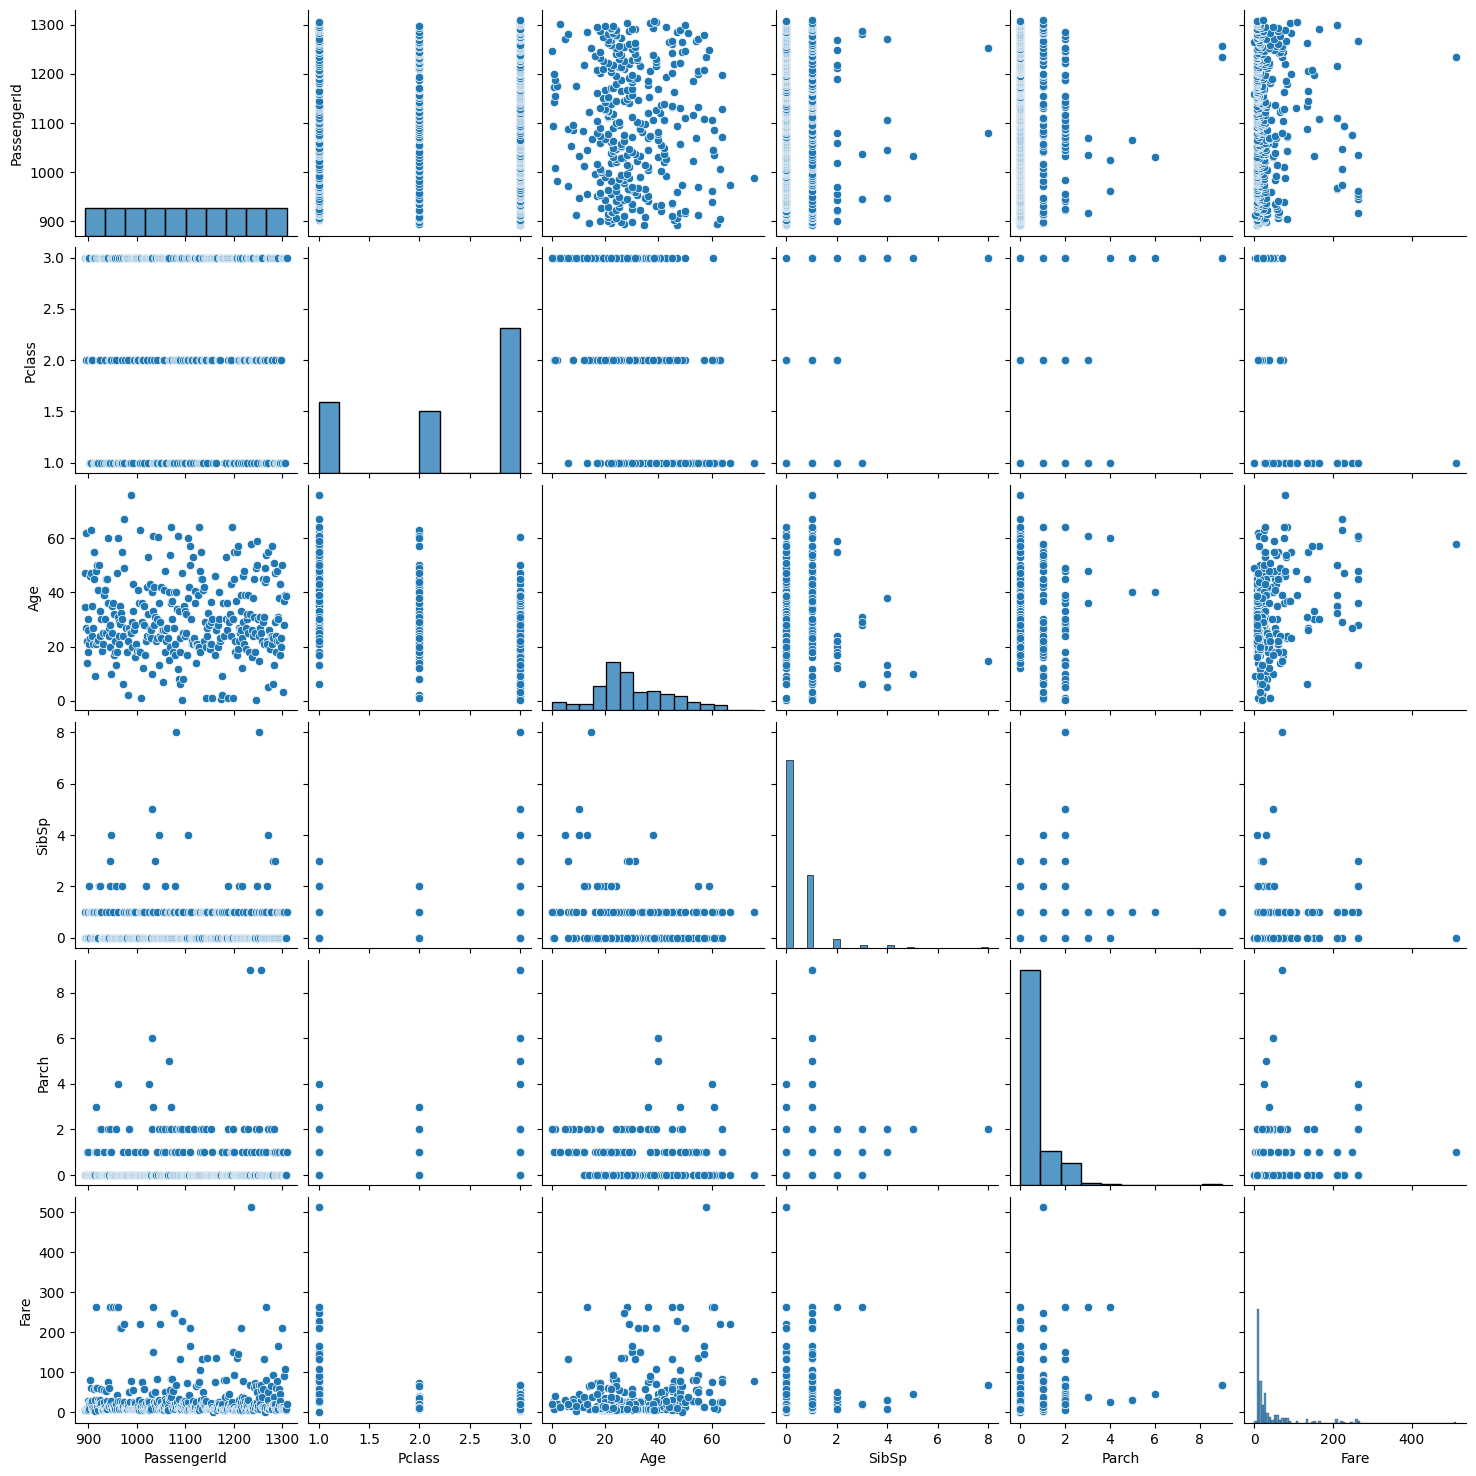

In [193]:
#pairplot for test_df
sns.pairplot(test_df)
plt.show()


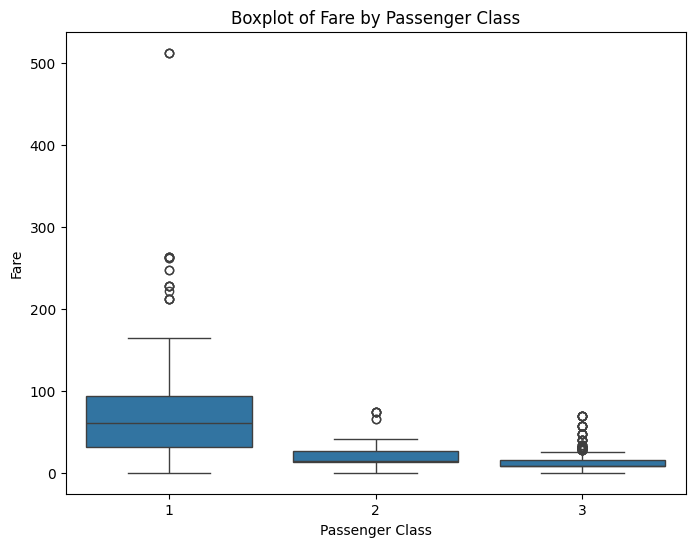

In [194]:
#boxplot for pclass and fare

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=train_df)
plt.title('Boxplot of Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()


Analyze any patterns or correlations observed in the data.

Pclass and Fare: There's a negative correlation between Pclass (Passenger Class) and Fare. This means higher passenger classes tend to have higher fares, which is expected as first-class tickets are more expensive. You visualized this using a bar plot.

Pclass and Survival: Pclass is likely correlated with survival. We need to explore this further using visualizations or statistical tests. Lower Pclass (1st class) might indicate higher survival rates.

Age Distribution: The age distribution is slightly skewed, with a higher concentration of passengers in the 20-30 age range. You visualized this using histograms.

Fare Distribution: The fare distribution is heavily skewed to the right, with most fares concentrated in the lower range. You visualized this using histograms.

Sex: There were more male passengers than female passengers. This is evident from the bar plots you created.

Embarked Port: Most passengers embarked from Southampton (Embarked = S). This is evident from the bar plots you created.


### **2. Data Preprocessing:**

In [195]:
train_df_len = len(train_df)
# combine two dataframes
df = pd.concat([train_df, test_df], axis=0)
df = df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [197]:
df.isna().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [198]:
df = df.drop(columns=['Cabin'], axis=1)

In [199]:
df['Age'].mean()

29.881137667304014

In [200]:
# fill missing values using mean of the numerical column
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
# fill missing values using mode of the categorical column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 112.6+ KB


Log transformation for uniform data distribution

<ipython-input-202-6a3f09abb6b0>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




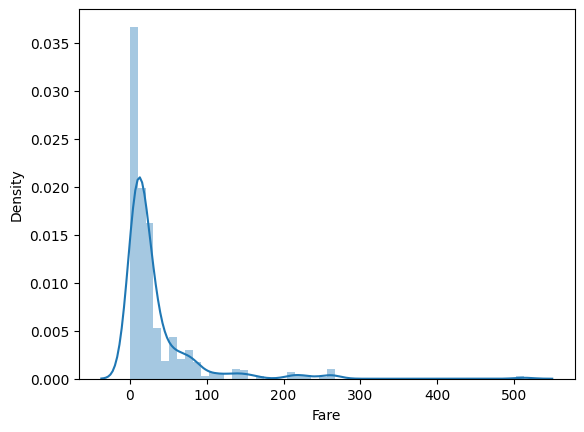

In [202]:
sns.distplot(df['Fare'])
plt.show()

In [203]:
df['Fare'] = np.log(df['Fare']+1)

<ipython-input-204-6a3f09abb6b0>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




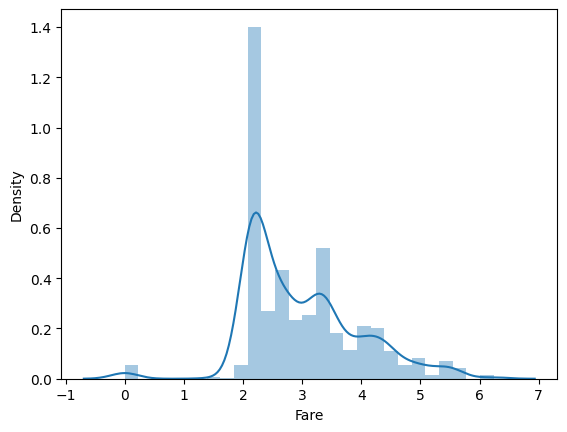

In [204]:
sns.distplot(df['Fare'])
plt.show()

**Correlation Matrix**

<Axes: >

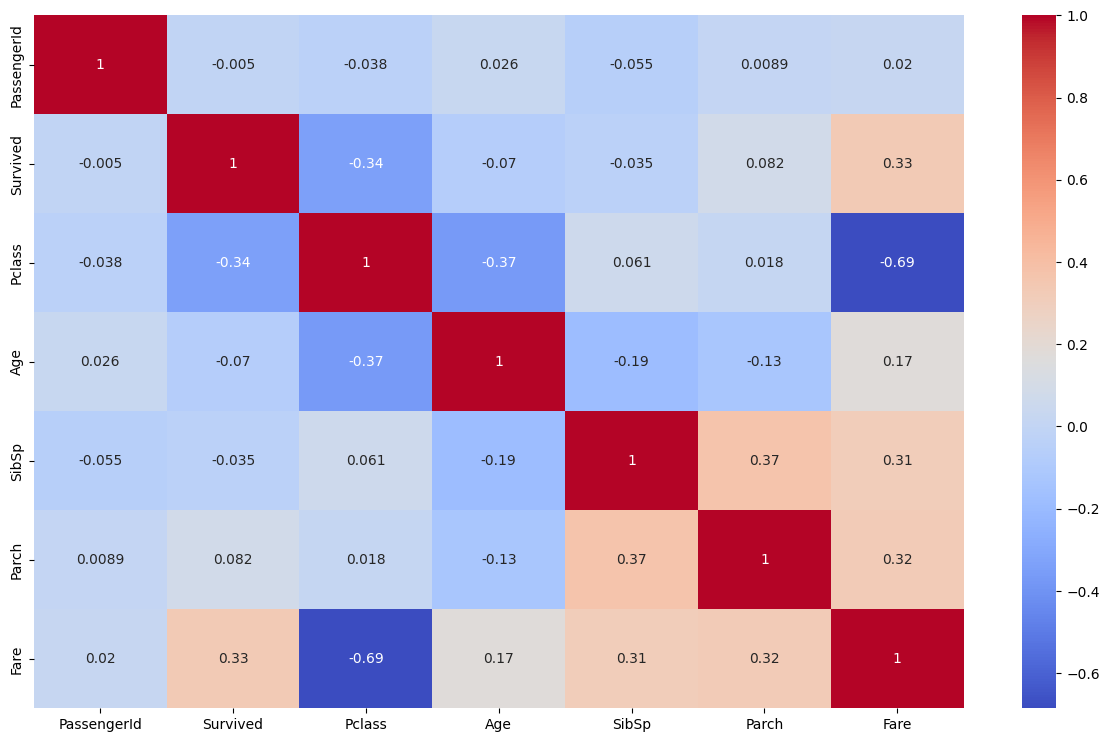

In [205]:
numerical_features = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical features
corr = numerical_features.corr()

plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [206]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


In [207]:
## drop unnecessary columns
df = df.drop(columns=['Name', 'Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,S
1,2,1.0,1,female,38.0,1,0,4.280593,C
2,3,1.0,3,female,26.0,0,0,2.188856,S
3,4,1.0,1,female,35.0,1,0,3.990834,S
4,5,0.0,3,male,35.0,0,0,2.202765,S


b. Encode categorical variables.

In [208]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


**3. Model Building**:


a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

**Logistic regression** is a statistical technique used to predict the probability of an outcome or a categorical response variable based on one or more predictor variables

In [210]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

b. Train the model using the training data.

In [212]:
train = df.iloc[:train_df_len, :]
test = df.iloc[train_df_len:, :]

In [213]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [214]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,2.178064,1
892,893,NaN,3,0,47.0,1,0,2.079442,2
893,894,NaN,2,1,62.0,0,0,2.369075,1
894,895,NaN,3,1,27.0,0,0,2.268252,2
895,896,NaN,3,0,22.0,1,1,2.586824,2


In [215]:
# input split
X = train.drop(columns=['PassengerId', 'Survived'], axis=1)
y = train['Survived']

In [216]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


In [220]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [223]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((668, 7), (223, 7), (668,), (223,))

In [233]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [234]:
y_pred = model.predict(x_test)

In [235]:
model_accuracy= model.score(x_test, y_test)
model_accuracy

0.8071748878923767

In [243]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("classification_report:\n",report)

classification_report:
               precision    recall  f1-score   support

         0.0       0.83      0.86      0.84       134
         1.0       0.77      0.73      0.75        89

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223



In [255]:
print('roc_score:',roc_auc_score(y_test,y_pred))

roc_score: 0.7942730169377831


In [254]:
print('roc_curve:\n',roc_curve(y_test,y_pred))

roc_curve:
 (array([0.        , 0.14179104, 1.        ]), array([0.        , 0.73033708, 1.        ]), array([inf,  1.,  0.]))


In [256]:
print('confusion_matrix:\n',confusion_matrix(y_test,y_pred))

confusion_matrix:
 [[115  19]
 [ 24  65]]


Visualize the ROC curve

Text(0, 0.5, 'True Positive Rate')

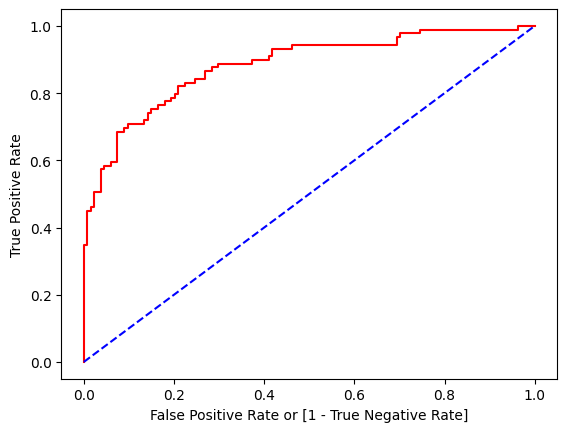

In [265]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba (x_test)[:,1])

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'b--') # k-- give diagnoal line --- , b is colour blue colour
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


The plot visually represents the trade-off between correctly classifying positive instances (TPR) and incorrectly classifying negative instances (FPR) for your classification model, along with a summary of its overall performance using the AUC score.


ROC Curve: It plots the trade-off between the true positive rate (TPR) and the false positive rate (FPR) for different threshold values.

fpr: False positive rate.
tpr: True positive rate.
thresholds: Threshold values used to compute fpr and tpr.

AUC (Area Under the Curve): It provides a single number to summarize the performance of the model, where:

1.0 = perfect classifier.

0.5 = random classifier (represented by the dashed diagonal line).

This plot and AUC score will help assess the classification model’s discriminative ability.

In [266]:
auc

0.7942730169377831

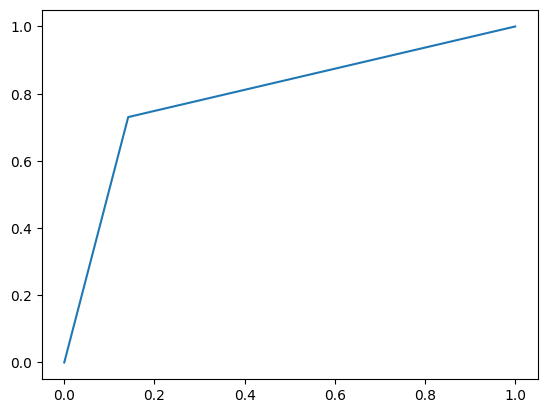

In [257]:
plt.plot(roc_curve(y_test,y_pred)[0],roc_curve(y_test,y_pred)[1])

### **5. Interpretation:**

a. Interpret the coefficients of the logistic regression model.

In [267]:
coefficients = model.coef_[0]
feature_names = X.columns

# Print the coefficients for each feature
for feature, coef in zip(feature_names, coefficients):
  print(f"{feature}: {coef}")

Pclass: -0.7756255225378816
Sex: -2.5381690445376464
Age: -0.03390976569816304
SibSp: -0.338341277385837
Parch: -0.18036790845372108
Fare: 0.3524996365018061
Embarked: -0.21506679912831408


- A **positive coefficient** means an increase in the feature raises the probability of the positive class (e.g., attorney involvement).
- A **negative coefficient** indicates an increase in the feature lowers the probability of the positive class.
- The **magnitude** of the coefficient reflects the strength of the feature's influence, and exponentiating it gives the odds ratio, showing the impact on odds for each unit change.

b. Discuss the significance of features in predicting the target variable (survival probability in this case).

In analyzing the Titanic dataset for survival prediction using logistic regression, several features stand out in determining a passenger's likelihood of survival:

1. **Sex (Gender)**: This is one of the most important features. Female passengers had a significantly higher probability of survival compared to males. In historical context, women and children were prioritized during evacuation.

2. **Passenger Class (Pclass)**: Higher-class passengers (1st class) had a better chance of survival compared to those in lower classes. This could be due to easier access to lifeboats and better accommodation location on the ship.

3. **Age**: Younger passengers, especially children, were more likely to survive. The "women and children first" policy likely influenced this, making age a crucial factor in survival probability.

4. **Fare**: Passengers who paid higher fares (which usually correlates with 1st class tickets) had better chances of survival, further reinforcing the importance of socio-economic status.

5. **Family Size**: Features like the number of siblings/spouses (SibSp) and parents/children (Parch) aboard influenced survival. Larger family groups often meant a higher survival chance, likely due to familial support in an emergency.

These features, when analyzed through logistic regression coefficients, provide insights into the direction and strength of their impact on survival. For example, a positive coefficient for **Sex (female)** means that being female increases the odds of survival, while a negative coefficient for **Pclass (3rd class)** means lower-class passengers are less likely to survive.

### **6. Deployment with Streamlit:**

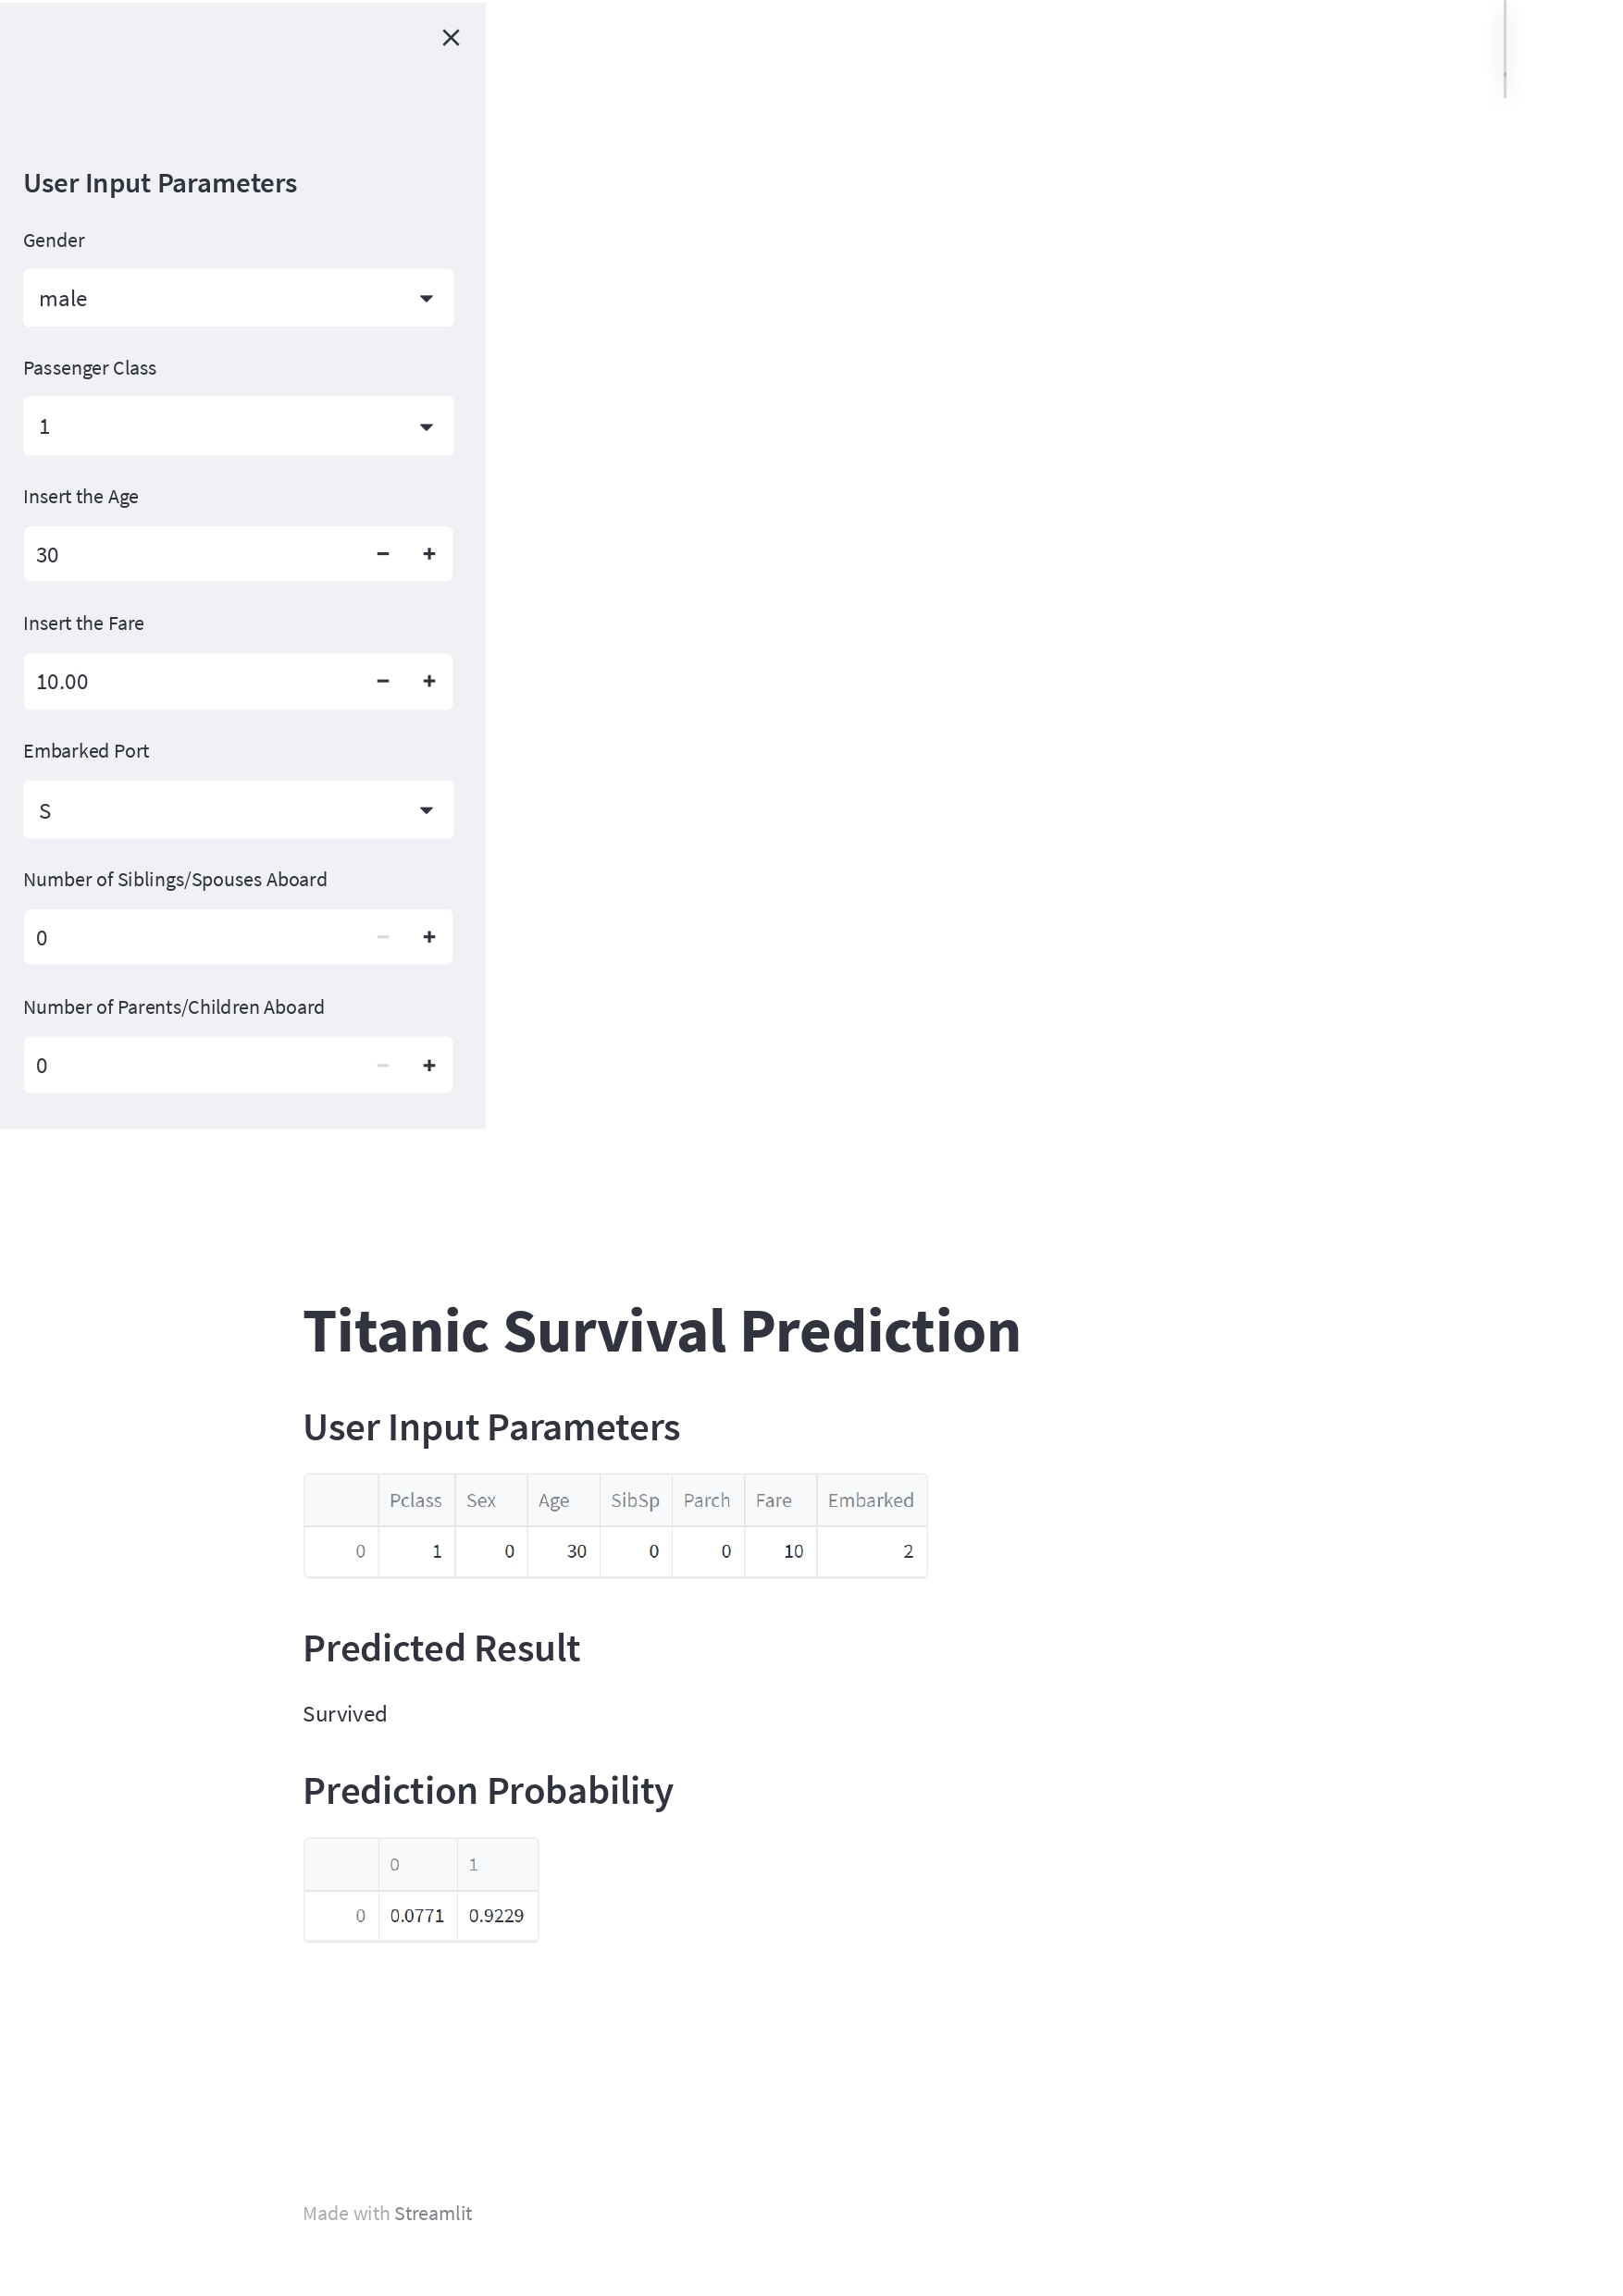

### **Interview Questions:**

**1. What is the difference between precision and recall?**
   
Precision is the ratio of true positive predictions to the total predicted positives (true positives + false positives). It measures how many of the predicted positives are actually correct.

Recall, also known as sensitivity, is the ratio of true positives to all actual positives (true positives + false negatives). It measures how many of the actual positives are correctly identified by the model.

Precision is more focused on minimizing false positives, while recall emphasizes minimizing false negatives.

A high precision model is trustworthy when it predicts a positive class, but it may miss some positive instances.

A high recall model catches most of the positive instances but may incorrectly classify some negative cases as positive.

In binary classification, balancing precision and recall is important depending on the problem context (e.g., fraud detection vs. medical diagnosis).

**2. What is cross-validation, and why is it important in binary classification?**

Cross-validation is a technique for evaluating a model by splitting the dataset into multiple subsets or "folds." The model is trained on some folds and tested on the remaining ones, cycling through each fold.

It helps ensure that the model’s performance is not overly dependent on any specific train-test split.

In binary classification, it reduces the risk of overfitting by giving a more robust estimate of the model's generalization to unseen data.

Common methods include k-fold cross-validation, where the dataset is split into k parts, and the model is validated k times, each time with a different test set.

This process provides a more reliable assessment of how the model performs across varying data subsets.

Cross-validation is crucial in smaller datasets or imbalanced classes to ensure a fair and balanced model evaluation.